In [ ]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

# Time Series Analysis

##Objectives
* Understand the structure of time series data
* Techniques to Acquire, Explore and Visualize time series data
* Analyze and Model
* Introduction to statsmodels time series analysis modules.

### Code Dictionary

code | description   
-----|------------   
`web.DataReader` | extracts data from various Internet sources
`pd.rolling_mean` | computes a moving average
`tsa.plot_acf` | plot the autocorrelation function

### Class Notes

### What is Time series data?

The only reason for time is so that everything doesn’t happen at once. — Albert Einstein   

Measurements are performed over time and these observations lead to a collection of organized data called time series. This data is *indexed* by date and/or timestamp. This is an important form of structured data in many different fields, such
as finance, economics, ecology, neuroscience, or physics
Examples: Prices of stocks, the weekly output of a manufacturing plant, the monthly number of traffic tickets or Nancy's [voice](https://www.youtube.com/watch?v=6gaq5-t14FE) as she grows up.

* Time series include:
    * _Timestamps_, specific instants in time
    * _Fixed periods_, i.e. the month of February 2015
    * _Intervals_, indicated by a start and end timestamp.
    * _Elapsed Time_, A measure relative to a given start time.

### Time series data vs Cross sectional data
Cross sectional data is a snapshot in time of a group of data. Eg: the Iris, Wine or the Cars data set.

### Acquire Time series data
Let's explore a few different methods to download or import time series data. 
- URL method using Pandas
- APIs - Yahoo Finance, Quandl, Google Finance   
The python datetime module: https://docs.python.org/2/library/datetime.html   
Pandas documentation to work with dates and timestamps: http://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')               # This just produces pretty plots
plt.rcParams['figure.figsize'] = (20, 10)                   # Set default figure size values for the entire notebook

In [3]:
# Pandas URL method 
# target URL: http://www.quandl.com/api/v1/datasets/YAHOO/INDEX_GSPC.csv?trim_start=2007-01-01&trim_end=2015-02-02
# Generate the URL string

url = "http://www.quandl.com/api/v1/datasets/YAHOO/"
url += "INDEX_GSPC"
url += ".csv?trim_start=%s-%s-%s&trim_end=%s-%s-%s" % ('2007', '01', '01', '2015', '02', '02')

sp500 = pd.read_csv(url, parse_dates = ['Date'], dayfirst = True, index_col = 'Date')

# parse_dates: This will parse the "Date" column as a datetime object instead of an object string
# index_col: Instead of creating a default index column, Use the "Date" column as an index
# dayfirst: Use DD/MM format, Default uses the MM/DD format 

In [3]:
sp500.head()

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2015-02-02,1996.670044,2021.660034,1980.900024,2020.849976,4008330000,2020.849976
2015-01-30,2019.349976,2023.319946,1993.380005,1994.989990,4538650000,1994.989990
2015-01-29,2002.449951,2024.640015,1989.180054,2021.250000,4127140000,2021.250000
2015-01-28,2032.339966,2042.489990,2001.489990,2002.160034,4067530000,2002.160034
2015-01-27,2047.859985,2047.859985,2019.910034,2029.550049,3329810000,2029.550049


In [6]:
import pandas.io.data as web

In [7]:
# This is the Pandas Remote Data Access module. It supports various Data Sources - Yahoo! Finance, Google Finance
# St.Louis FED (FRED), Kenneth French’s data library, World Bank, Google Analytics
# 

spc = web.DataReader(name = "^GSPC", data_source = 'yahoo', start = '2007-1-1', end = '2015-2-2')
#spc.to_csv("SP500.csv")         # Function to save a data frame for offline analysis  
spc.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-27,2047.859985,2047.859985,2019.910034,2029.550049,3329810000,2029.550049
2015-01-28,2032.339966,2042.489990,2001.489990,2002.160034,4067530000,2002.160034
2015-01-29,2002.449951,2024.640015,1989.180054,2021.250000,4127140000,2021.250000
2015-01-30,2019.349976,2023.319946,1993.380005,1994.989990,4538650000,1994.989990
2015-02-02,1996.670044,2021.660034,1980.900024,2020.849976,4008330000,2020.849976


#### Random Walk : Generate your own time series
A purely random process is one in which $x_t = z_t$, where $\{z_t\}$ are i.i.d. We could choose any distribution. 
Lets choose $\\N({0},{\sigma^2})$, also called white noise.
Also known as Brownian motion, this is one of the simplest time series:

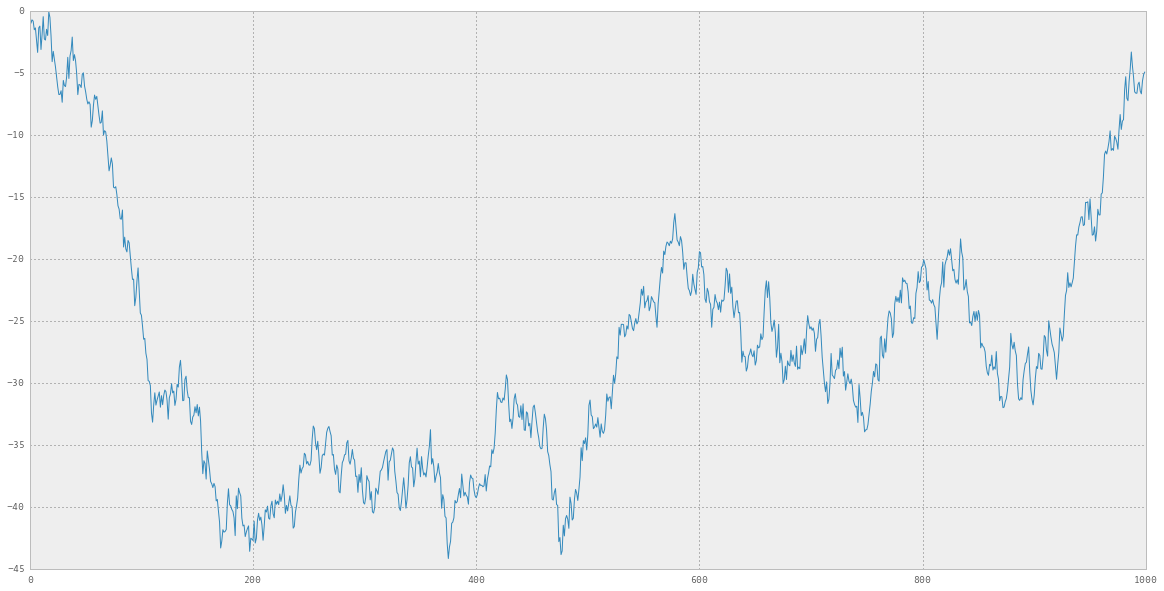

In [8]:
N = 1000
z = np.random.randn(N)
walk = np.zeros(N)

for i in np.arange(1, N, 1):
    walk[i] = walk[i - 1] + z[i]
plt.plot(walk)

#### Your turn to download and explore the data
Look at [Quandl](https://www.quandl.com/) and Download any data set of your choice. 
Example AAPL stock quote: https://www.quandl.com/GOOG/NASDAQ_AAPL-Apple-Inc-AAPL 

### Computing Rolling Statistics
Instead of computing a single column-wise `mean()` or `sum()`, what if we were to look at a small subset of values within this column. Analyze the data points by creating a new series. This is similar to applying FIR filter (signal processing: Finite impulse response) on the signal. The random component of a time series are called as Shocks. eg: The crash in late 2008.

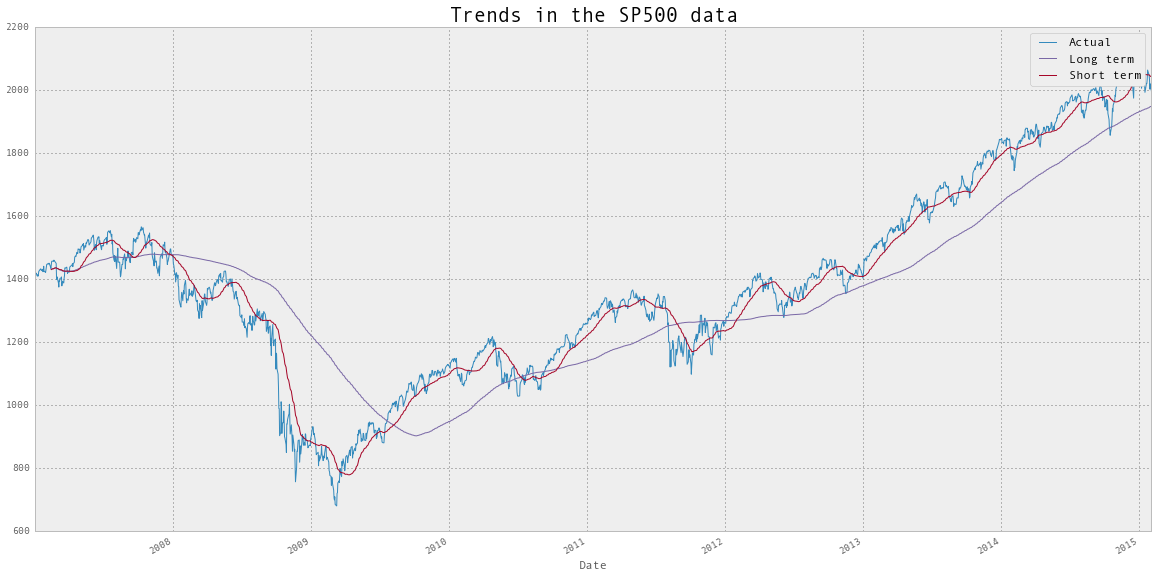

In [8]:
# Compute rolling statistics
spc['MA42'] = pd.rolling_mean(spc['Open'], window = 42, min_periods = 30)
spc['MA252'] = pd.rolling_mean(spc['Open'], window = 252,  min_periods = 30)
spc[['Open', 'MA252', 'MA42']].plot()
plt.legend(["Actual", "Long term", "Short term"])
plt.title('Trends in the SP500 data', fontsize = 20)

####Explore the `rolling_std()` and `rolling_median()` functions and plot them
Documentation: http://pandas.pydata.org/pandas-docs/stable/computation.html

###Seasonality and Trends
Let us further explore trends in Time series data. Google breaks down search traffic according to economic sectors on a yearly basis. Let us take the example of the [Google Rental Index](https://www.google.com/finance?q=GOOGLEINDEX_US%3ARENTAL&ei=SjTYVODIB4698QabxYCABA) for New York City.  The data clearly shows seasonal variations. 

Why is it important to study seasonality? eg: How does the quality of the computers produced vary systematically over the days of the week?  

Similarly, Trends identify the underlying tendencies in the data over a period of time. By using trend estimation it is possible to construct a model which is independent of anything known about the nature of the process of an incompletely understood system (for example, physical, economic, or other system). (src: wikipedia)

Once they have been identified, the data is de-seasonalized and de-trended to study the effect of other components such as cyclical and irregular variations. 
The Google Domestic Trends are very well curated. You can play with the data offline, by downloading the csv. As an example of irregular or anomalous behaviour, Check: [Google Bankruptcy Index](https://www.google.com/finance?q=GOOGLEINDEX_US%3ABNKRPT&ei=_znYVJjfMZOHsgeHv4G4Cg)

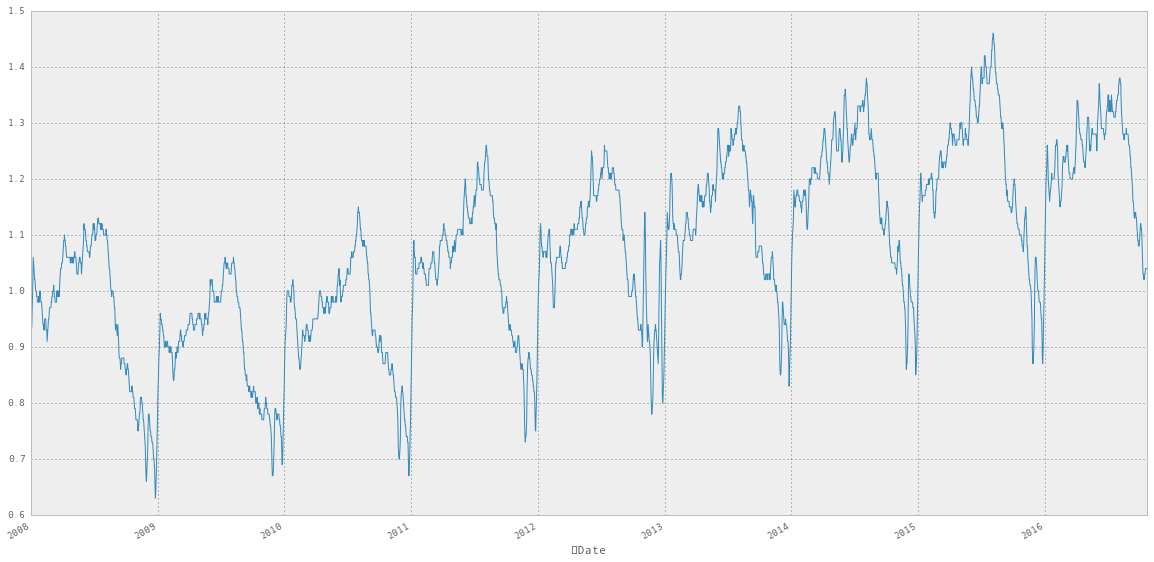

In [9]:
url = "https://www.google.com/finance/historical?q=GOOGLEINDEX_US:RENTAL\
&output=csv&startdate=20080101&ei=_znYVJjfMZOHsgeHv4G4Cg"

r = pd.read_csv(url, parse_dates = [0], index_col = 0)
r.Close.plot()

Some important questions to first consider when first looking at a time series are:

* Is there a trend, meaning that, on average, the measurements tend to increase (or decrease) over time?
* Is there seasonality, meaning that there is a regularly repeating pattern of highs and lows related to calendar time such as seasons,months, days and so on?
* Are their outliers? In regression, outliers are far away from your line. With time series data, your outliers are far away from your other data.
* Is there a long-run cycle or period unrelated to seasonality factors?
* Is there constant varianceover time, or is the variance non-constant?
* Are there any abrupt changes to either the level of the series or the variance?

###Visualizing the Time Series as a Correlation Matrix

In [10]:
import datetime as dt

# get_data_yahoo() API gets data from yahoo finance directly. 
df = web.get_data_yahoo(
     ['AAPL', 'GE', 'IBM', 'KO', 'MSFT', 'PEP'], 
     start = dt.datetime(2010, 1, 1), 
     end = dt.datetime(2013, 1, 1))['Adj Close']
df.head()

,AAPL,GE,IBM,KO,MSFT,PEP
Date,,,,,,
2010-01-04,27.990226,12.366038,113.304536,23.318762,25.884104,50.218663
2010-01-05,28.038618,12.430070,111.935822,23.036679,25.892466,50.825483
2010-01-06,27.592626,12.366038,111.208683,23.028504,25.733566,50.317065
2010-01-07,27.541619,13.006351,110.823732,22.971269,25.465944,49.997254
2010-01-08,27.724725,13.286488,111.935822,22.546103,25.641571,49.833247


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


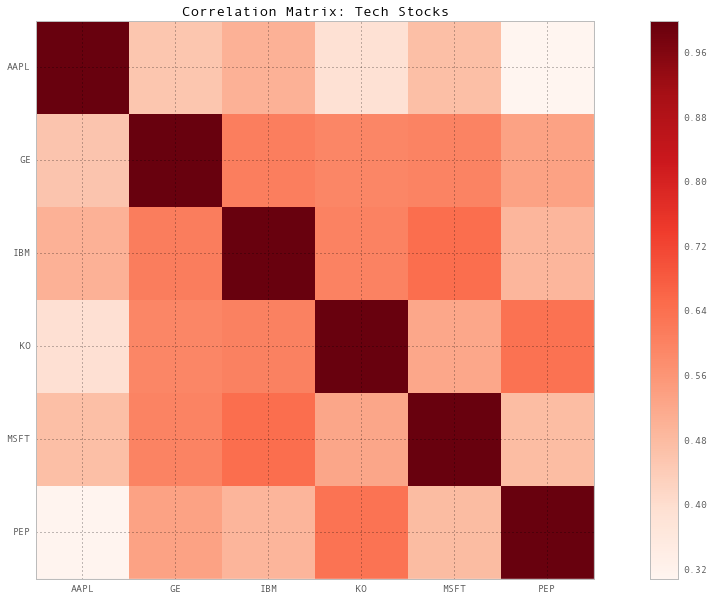

In [11]:
rets = df.pct_change()                              # Calculates Percent change over 1-day period. 
corr = rets.corr()                                  # Computes pairwise correlation of columns
plt.imshow(corr, cmap = 'Reds', interpolation = 'none')    # Visualize the values in the entire data frame.
plt.colorbar()                                            
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);
plt.title("Correlation Matrix: Tech Stocks")

Use the API to download different stock tickers and see how the matrix changes. What does it mean, when 2 time series are highly correlated? 

###Visualizing the Time Series as a OHLC (candle stick) Chart
[Bokeh](http://bokeh.pydata.org/en/latest/) is a Python interactive visualization library for browsers based presentation. It provides D3 style plots. 

### Time Series Analysis

**Intro to statsmodels tsa library**
The Statsmodels library includes a dedicated time series analysis model classes, associated functions and custom plots.   
Documentation: http://statsmodels.sourceforge.net/devel/tsa.html

### Random Variables, Stochastic Process, Stationarity:

A **random variable** is a variable whose possible values are numerical outcomes each associated with a probability, of a random phenomenon. We express the likelihood function as the product over all data points of the probability distribution for each data point. Examples:   
* Outcomes of Roulette spin
* Dice 
* Coin Flips
* The normal distribution
* Statistical tests of means of random variables (i.e. p-values, z-tests, tests about means of random)

**I.I.Ds** are Independent Identically Distributed random variables; meaning they have the same probability distribution and are mutually independent random variables.   

A **Stochastic Process** contains a set/collection of such random variables observed over time. 

Many real world cases, we see a violation. Examples:   
* Weather: rain today might portend more rain tomorrow. 
* Language: Sequence of characters, or words even, in the English languages 
* Our DNA: Nucleotide base pairs
* Financial returns

**Inference: ** Going back to the difference between time series data and cross-sectional data - cross sectional data deals with only i.i.d observations while in time series each new arriving observation is stochastically depending on the previously observed. 

**Stationarity: ** Stationary series vary around a constant mean level, neither decreasing nor increasing systematically over time, with constant variance. Nonstationary series have systematic trends, such as linear, quadratic, and so on.
Statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.   
In the stationary case, the data evolves in time, but the distribution from which it is generated remains the same. For the more complex non-stationary situation, the generative distribution itself is evolving with time.   
*Stationary rule of thumb: ~= No predictable cycle, no predictable trend, returns to a baseline over time.*

![](http://upload.wikimedia.org/wikipedia/en/e/e1/Stationarycomparison.png)

### Autocorrelation

Typically, in time series, there is some decay of  correlation: $x_n$ and $x_{n+k}$ become more and more nearly independent as $k \to \infty$. We study this by the covariance or autocovariance defined above, or equivalently by the autocorrelation.

Autocorrelation is the similarity between observations as a function of the time lag between them. It is a mathematical tool for finding repeating patterns, such as the presence of a periodic signal obscured by noise.

![AutoCorrelation Equation](http://upload.wikimedia.org/math/3/7/c/37c9812eaf2deca258f5526ac9067aa2.png)

X: Repeatable process
i: point in time
s: another point in time
R(s,t) = Autocorrelation between times s and t

![ACF Sine example](http://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Acf_new.svg/217px-Acf_new.svg.png)
Above: A plot of a series of 100 random numbers concealing a sine function. Below: The sine function revealed in a correlogram produced by autocorrelation.

The auto correlation function (ACF) gives us the pattern of auto correlations in a time series at numerous lags. Computing the ACF & the partial AutoCorrelation function (PACF): Captures Trends and Seasonality in the data. 

###Autoregression

The autoregressive model specifies that the output variable depends linearly on its own previous values. Example: The Random Walk data generated above. Most of the lags falling between the confidence intervals indicates that our model appropriately
reflects the autoregressive nature of our data

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


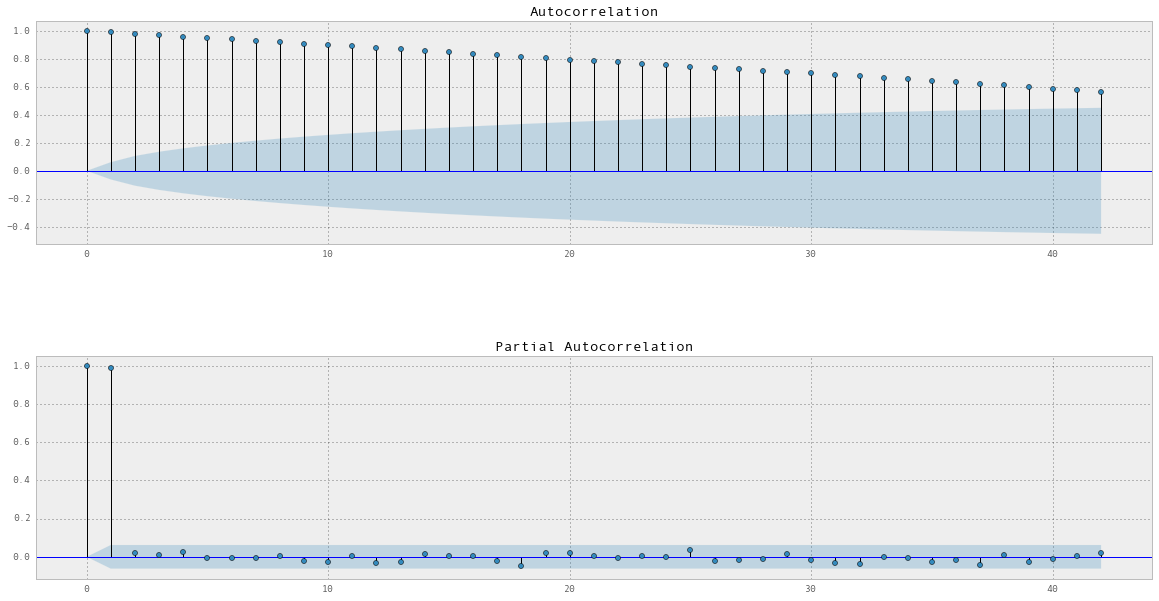

In [9]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsa

# Calculate Autocorrelation, Partial Auto Correlation and the Correlogram  
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = tsa.plot_acf(walk, lags = 42, ax = ax1)   
ax2 = fig.add_subplot(212)
fig = tsa.plot_pacf(walk, lags = 42, ax = ax2)


###ARMA Forecasting Model
The ARMA model contains 2 component, an Auto regressive and a Moving Average. The AR part indicates the number of terms in the model that describe the dependency among successive observations and the MA part indicates the number of terms that describe the persistence of a random shock from one observation to the next. Statsmodel [Documentation](http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.arima_model.ARMA.html#statsmodels.tsa.arima_model.ARMA)

In [10]:
arma_mod22 = sm.tsa.ARMA(walk, (2, 2)).fit()
print(arma_mod22.summary())
print "Durbin Watson score: ", sm.stats.durbin_watson(arma_mod22.resid)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1432.216
Method:                       css-mle   S.D. of innovations              1.011
Date:                Mon, 31 Oct 2016   AIC                           2876.432
Time:                        19:05:19   BIC                           2905.879
Sample:                             0   HQIC                          2887.624
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -14.7751     12.223     -1.209      0.227       -38.732     9.182
ar.L1.y        1.3573      0.171      7.942      0.000         1.022     1.692
ar.L2.y       -0.3586      0.171     -2.102      0.0

(659.36671539491158, 6.6120629050687891e-144)


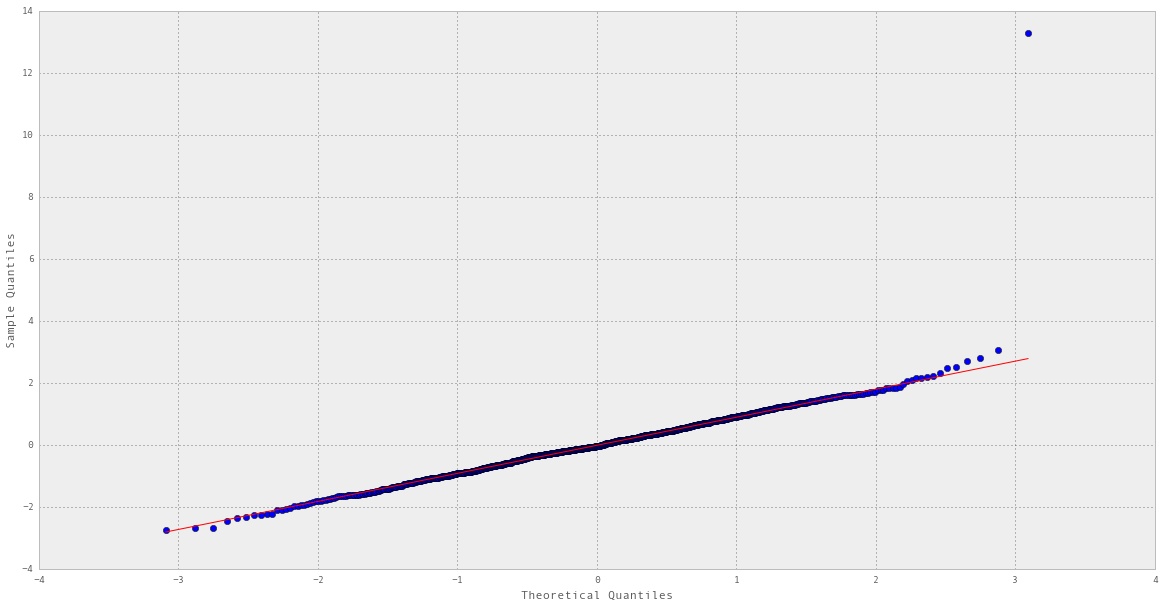

In [11]:
from statsmodels.graphics.api import qqplot
from scipy import stats

resid = arma_mod22.resid
print stats.normaltest(resid)
fig = qqplot(resid, line = 'q', fit = True)

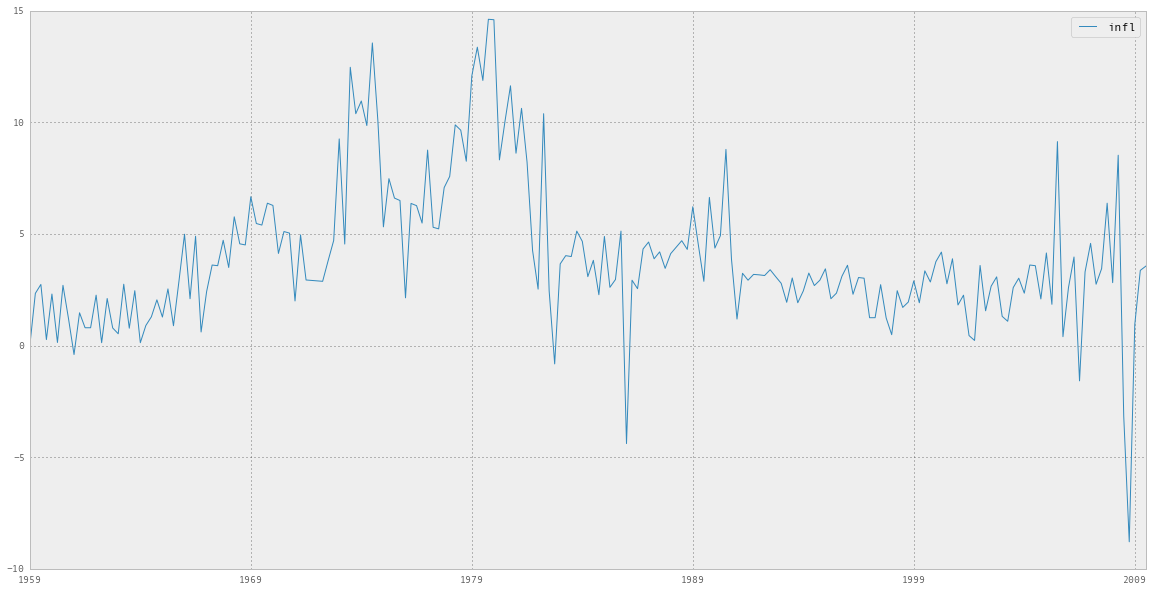

In [12]:
# CPI Data set: Explore this data set in class
# Plot and Compute the various statistics
# Explain the Correlograms

macrodta = sm.datasets.macrodata.load_pandas().data
macrodta.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

cpi = macrodta["infl"]
macrodta

fig = plt.figure()
ax = fig.add_subplot(111)
ax = cpi.plot(ax = ax)
ax.legend()

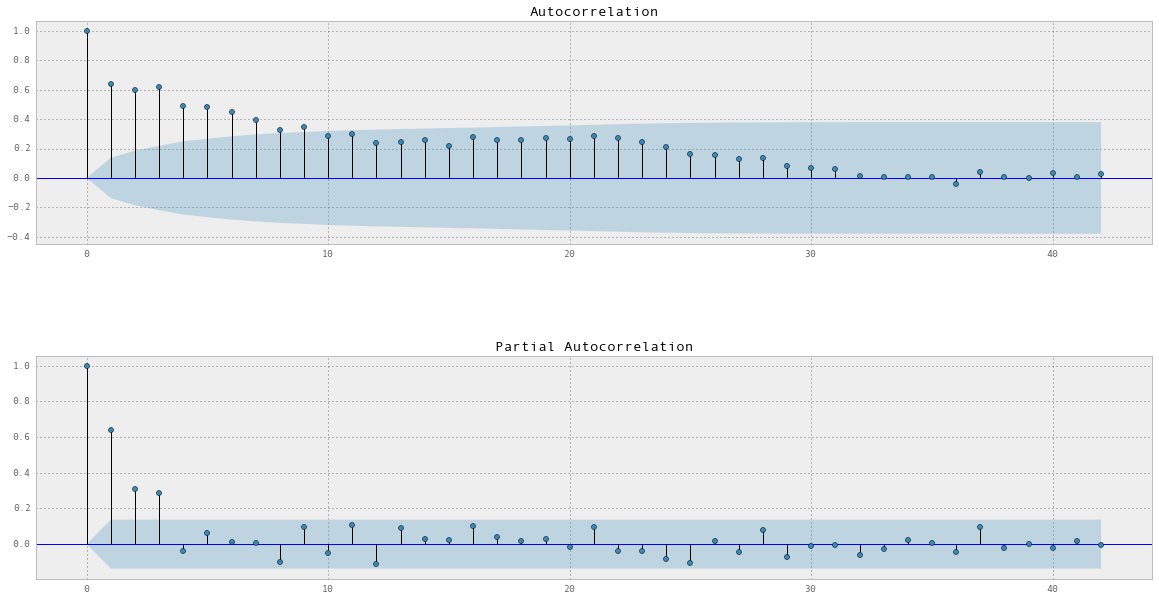

In [13]:
# Calculate Autocorrelation, Partial Auto Correlation and the Correlogram  
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(cpi, lags = 42, ax = ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(cpi, lags=42, ax = ax2)

### Review, next steps, practice
* We've explored several different APIs to download and analyze time series data
* Pandas re-indexing and re-sampling: http://nbviewer.ipython.org/github/changhiskhan/talks/blob/master/pydata2012/pandas_timeseries.ipynb
* Explore the statsmodels examples for the ARMA process: http://nbviewer.ipython.org/github/statsmodels/statsmodels/blob/master/examples/notebooks/tsa_arma_1.ipynb
* Understand the Correlograms. Look through the examples for White Noise, Weak ACF, Periodic ACF
* This paper compares the various Data Mining & Machine Learning techniques applied to Time series: http://wiki.epfl.ch/edicpublic/documents/Candidacy%20exam/a12-esling%20time-series%20data%20mining.pdf
* Great example of Anomaly detection in time series along with the R code from Twitter: https://blog.twitter.com/2015/introducing-practical-and-robust-anomaly-detection-in-a-time-series